# Earth Lab Python Course Final Project: US Soil Moisture Project

* This notebook is a data retrieval notebook for soil moisture data from the National Soil Moisture Network SCAN stations.
* Data Source: National Soil Moisture Network; Soil Climate Analysis Network (SCAN)

In [1]:
NAME = "Kendall Rosenberg"
COLLABORATORS = "N/A"

In [2]:
# variable = "bushland"

## Outstanding tasks:
* AUTOMATION !!!
* edit function docstrings in the python script
* define how to run notebook in README
* examine / deal with missing data
* converting to netCDF (netCDF4?)

## Future tasks/direction:
* import drought data for one site
* crop a buffer to the site location for drought raster
* average the pixel values around the site
* standardize / compare to SM data

## Import Libraries

In [3]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import earthpy as et
import warnings
import pandas as pd
import earthpy.plot as ep

# Ignore warnings
warnings.simplefilter('ignore')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'Soil-Moisture-Project', 'usgs-nccasc-soil-moisture'))

# # Create export csv directory
# if not os.path.exists("soil-moisture-export-csvs"):
#     os.mkdir("soil-moisture-export-csvs")
    
# # Create export plot directory
# if not os.path.exists("soil-moisture-export-plots"):
#     os.mkdir("soil-moisture-export-plots")

In [4]:
# # Command to make all dataframes display in full
# pd.set_option("display.max_rows", None, "display.max_columns", None)

## Functions:

In [5]:
# import custom script of functions needed to run this notebook
import customfunctions

### Need docstring / in-progress

In [6]:
# # Function to export a soil moisture dataframe as a csv to Jupyter Hub
# def export_csv(dataframe, export_path):
#     dataframe.to_csv(export_path)

## Download and Import Data

* Use custom function defined above to download, import, and clean each site's data.  These cleaned output dataframes are then placed inside of an output dictionary for ease of access.
* Each site can be called in the dictionary by the station name I have assigned it.  The names of available station data are displayed below the following cell.
* All of the data is placed into a dictionary under the name "soil_moisture_dict"

In [7]:
# Run script to import data
%run imports.py

# Display a list of all stations imported
print(station_list)

['bushland', 'nunn', 'fort_assiniboine', 'mandan', 'lind', 'beasley_lake', 'eastview_farm', 'mammoth_cave', 'abrams']


In [8]:
month_list = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

### Preview dataframe for any station

In [9]:
# Query for a specific station's soil moisture dataframe
soil_moisture_dict["bushland"]

,Station ID,year,month,day,doy,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm,decad,pentad
0,bushland,1996.0,Nov,5.0,310.0,0.334,0.373,0.415,0.226,NaN,decad0,pentad0
1,bushland,1996.0,Nov,6.0,311.0,0.334,0.368,0.414,0.229,NaN,decad0,pentad1
2,bushland,1996.0,Nov,7.0,312.0,0.332,0.366,0.415,0.225,NaN,decad0,pentad1
3,bushland,1996.0,Nov,8.0,313.0,0.331,0.366,0.412,0.225,NaN,decad0,pentad1
4,bushland,1996.0,Nov,9.0,314.0,0.331,0.363,0.410,0.228,NaN,decad0,pentad1
...,...,...,...,...,...,...,...,...,...,...,...,...
7072,bushland,2019.0,Jan,18.0,18.0,NaN,0.252,0.376,0.429,0.379,decad1,pentad3
7073,bushland,2019.0,Jan,19.0,19.0,NaN,0.252,0.376,0.429,0.379,decad1,pentad3
7074,bushland,2019.0,Jan,20.0,20.0,NaN,0.257,0.378,0.428,0.378,decad1,pentad3
7075,bushland,2019.0,Jan,21.0,21.0,NaN,0.262,0.379,0.428,0.378,decad2,pentad4


In [10]:
# # Change working directory for export csvs
# os.chdir("soil-moisture-export-csvs")

In [11]:
# # Export to csv file
# soil_moisture_dict["bushland"].to_csv("bushland_all.csv")

# # Where was this exported? See output
# os.getcwd()

### Missing data review

In [12]:
# Total number of missing values in each column
soil_moisture_dict["bushland"].isnull().sum()

Station ID      0
year            0
month           0
day             0
doy             0
sm_5cm        164
sm_10cm         0
sm_20cm       163
sm_50cm       331
sm_100cm      180
decad           0
pentad          0
dtype: int64

### Histogram of station data

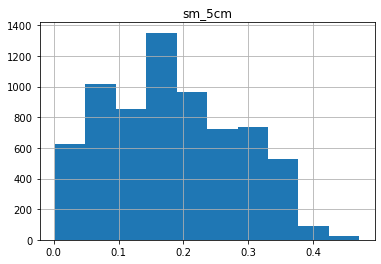

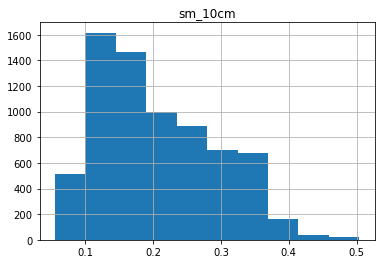

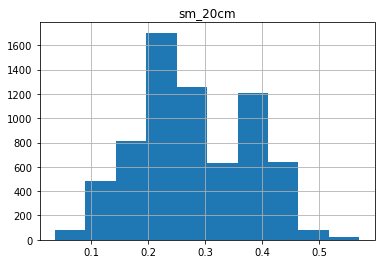

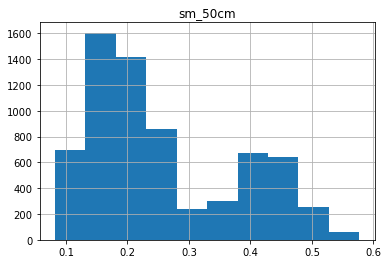

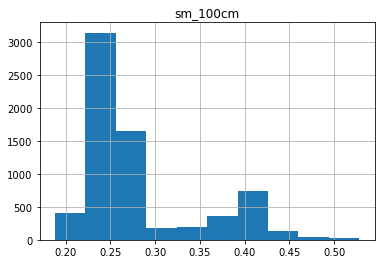

In [13]:
# Histogram of soil moisture values for a specific depth
customfunctions.generate_hist(soil_moisture_dict["bushland"])

## Yearly Dataframes

### Yearly average SM at each depth

In [14]:
# Yearly average SM for any input station
station_yearly_mean_sm = customfunctions.yearly_avg_sm(soil_moisture_dict["bushland"])
station_yearly_mean_sm.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
1997.0,0.303501,0.283471,0.350668,0.310074,0.270207
1998.0,0.250584,0.267707,0.325737,0.324337,0.330614
1999.0,0.285592,0.277441,0.326066,0.346526,0.323247
2000.0,0.248454,0.240333,0.245344,0.325503,0.252210
2001.0,0.243230,0.221227,0.216830,0.276962,0.276490


In [15]:
# # Export above dataframe to csv
# station_yearly_mean_sm.to_csv("bushland_annual_mean.csv")

# # Where was this exported? See output
# os.getcwd()

### Yearly average SM for a specific month (JAN) "month of the year"

In [16]:
# January yearly average for the Bushland, TX station
station_yr_mean_month = customfunctions.yearly_mean_month(soil_moisture_dict["bushland"], "Jan")

station_yr_mean_month.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
year,,,,,
1997.0,0.331323,0.361419,0.412935,0.380194,NaN
1998.0,0.324935,0.344065,0.410355,0.417677,0.306516
1999.0,0.273129,0.276097,0.363935,0.424484,0.378935
2000.0,0.340677,0.328484,0.382032,0.431226,0.243516
2001.0,0.347032,0.333903,0.319452,0.240097,0.230000


In [17]:
# # Export above dataframe to csv
# station_yr_mean_month.to_csv("bushland_annual_mean_jan.csv")

# # Where was this exported? See output
# os.getcwd()

## Monthly Dataframes

### Monthly average SM at each depth for a specific year
* year must be in integer format

In [18]:
# Monthly mean SM for the Bushland, TX station in the year 2018
station_monthly_mean_year = customfunctions.monthly_mean(soil_moisture_dict["bushland"], 2000)

station_monthly_mean_year

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Apr,0.270267,0.274967,0.370600,0.441867,0.248233
Aug,0.133710,0.140129,0.080677,0.266645,0.266581
Dec,0.308516,0.293323,0.278645,0.283903,0.235097
Feb,0.302862,0.290931,0.362448,0.406966,0.242414
Jan,0.340677,0.328484,0.382032,0.431226,0.243516
Jul,0.272258,0.231581,0.236065,0.270000,0.265613
Jun,0.255300,0.231600,0.225333,0.265667,0.261767
Mar,0.313742,0.280387,0.396710,0.423129,0.245935
May,0.184581,0.183806,0.172032,0.294871,0.254484


In [19]:
# # Export above dataframe to csv
# station_monthly_mean_year.to_csv("bushland_monthly_mean_2000.csv")

# # Where was this exported? See output
# os.getcwd()

### Monthly average SM at each depth across all years of data

In [20]:
# Monthly mean SM across all years of data for the Bushland, TX station
station_monthly_mean_all_years = customfunctions.monthly_mean_all_years(soil_moisture_dict["bushland"])

station_monthly_mean_all_years

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
month,,,,,
Jan,0.213421,0.231745,0.288462,0.280469,0.279481
Feb,0.234058,0.250009,0.315587,0.297199,0.277695
Mar,0.222238,0.241435,0.327301,0.300645,0.291070
Apr,0.180884,0.203661,0.298963,0.285104,0.294789
May,0.162750,0.185088,0.266969,0.260536,0.292708
Jun,0.167968,0.185611,0.270082,0.238613,0.282688
Jul,0.172617,0.185016,0.267057,0.235588,0.275444
Aug,0.151477,0.186474,0.260647,0.232595,0.277965
Sep,0.147986,0.184263,0.249305,0.219524,0.267153


In [21]:
# # Export above dataframe to csv
# station_monthly_mean_all_years.to_csv("bushland_monthly_mean_all.csv")

# # Where was this exported? See output
# os.getcwd()

## Daily Dataframes

### Daily average SM at each depth across a specific year
* year must be in integer format

In [22]:
# Daily average SM for the Bushland, TX station for the year 2018
station_daily_avg_year = customfunctions.daily_avg(soil_moisture_dict["bushland"], 2018)

station_daily_avg_year

,Station ID,year,month,day,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm,decad,pentad
doy,,,,,,,,,,,
1.0,bushland,2018.0,Jan,1.0,0.180,0.131,0.283,0.381,0.383,decad0,pentad0
2.0,bushland,2018.0,Jan,2.0,0.199,0.124,0.276,0.385,0.385,decad0,pentad0
3.0,bushland,2018.0,Jan,3.0,0.205,0.136,0.280,0.383,0.383,decad0,pentad0
4.0,bushland,2018.0,Jan,4.0,0.201,0.139,0.278,0.383,0.381,decad0,pentad0
5.0,bushland,2018.0,Jan,5.0,0.199,0.136,0.281,0.383,0.382,decad0,pentad0
...,...,...,...,...,...,...,...,...,...,...,...
361.0,bushland,2018.0,Dec,27.0,NaN,0.234,0.370,0.441,0.388,decad2,pentad5
362.0,bushland,2018.0,Dec,28.0,NaN,0.234,0.368,0.442,0.389,decad2,pentad5
363.0,bushland,2018.0,Dec,29.0,NaN,0.234,0.370,0.441,0.388,decad2,pentad5


In [23]:
# # Export above dataframe to csv
# station_daily_avg_year.to_csv("bushland_daily_mean_2018.csv")

# # Where was this exported? See output
# os.getcwd()

### Daily average SM for each day of the year, across all years of data

In [24]:
# Daily average SM across all years of data for the Bushland, TX station
station_daily_mean_all_years = customfunctions.daily_avg_all_years(soil_moisture_dict["bushland"])

station_daily_mean_all_years.head()

,sm_5cm,sm_10cm,sm_20cm,sm_50cm,sm_100cm
doy,,,,,
1.0,0.211053,0.22995,0.283684,0.275105,0.279211
2.0,0.210263,0.22865,0.283000,0.275684,0.279263
3.0,0.216789,0.23130,0.287421,0.275105,0.281789
4.0,0.215632,0.23300,0.287368,0.292895,0.281316
5.0,0.213421,0.23160,0.288158,0.296158,0.282000


In [25]:
# # Export above dataframe to csv
# station_daily_mean_all_years.to_csv("bushland_daily_mean_all.csv")

# # Where was this exported? See output
# os.getcwd()

## Decad Dataframe

* decad0 = days 1-10
* decad1 = days 11-20
* decad2 = days 20-31 

In [34]:
# Dataframe showing mean soil moisture on a decad (~10 day) timescale for a given station/year
customfunctions.decad_mean(soil_moisture_dict["bushland"], 2000).head()

sm_5cm   sm_10cm   sm_20cm   sm_50cm  sm_100cm
month decad                                                 
Jan   decad0  0.3549  0.342600  0.392200  0.446400  0.245100
      decad1  0.3415  0.329600  0.381900  0.428800  0.242800
      decad2  0.3270  0.314636  0.372909  0.419636  0.242727
Feb   decad0  0.3197  0.307500  0.366000  0.409800  0.242100
      decad1  0.3050  0.294100  0.362800  0.407900  0.242500

## Pentad Dataframe

* pentad0 = days 1-5
* pentad1 = days 6-10
* pentad2 = days 11-15
* pentad3 = days 16-20
* pentad4 = days 21-25
* pentad5 = days 25-31

In [27]:
# Dataframe showing mean soil moisture on a pentad (~5 day) timescale for a given station/year
customfunctions.pentad_mean(soil_moisture_dict["bushland"], 2000)

sm_5cm  sm_10cm   sm_20cm  sm_50cm  sm_100cm
month pentad                                               
Jan   pentad0  0.3596   0.3468  0.397600   0.4534    0.2450
      pentad1  0.3502   0.3384  0.386800   0.4394    0.2452
      pentad2  0.3438   0.3324  0.383800   0.4314    0.2428
      pentad3  0.3392   0.3268  0.380000   0.4262    0.2428
      pentad4  0.3306   0.3184  0.377200   0.4232    0.2434
...               ...      ...       ...      ...       ...
Dec   pentad1  0.3178   0.3074  0.288200   0.3020    0.2358
      pentad2  0.3082   0.2968  0.280400   0.2900    0.2338
      pentad3  0.3064   0.2904  0.276400   0.2790    0.2356
      pentad4  0.3000   0.2800  0.270800   0.2670    0.2340
      pentad5  0.2970   0.2720  0.265667   0.2565    0.2330

[72 rows x 5 columns]

## PLOTS OF SOIL MOISTURE

In [28]:
# # Change directory for output plots
# os.chdir("soil-moisture-export-plots")

### Yearly plots

* The code cell below will generate a plot of yearly mean soil moisture based on an input of the station name.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

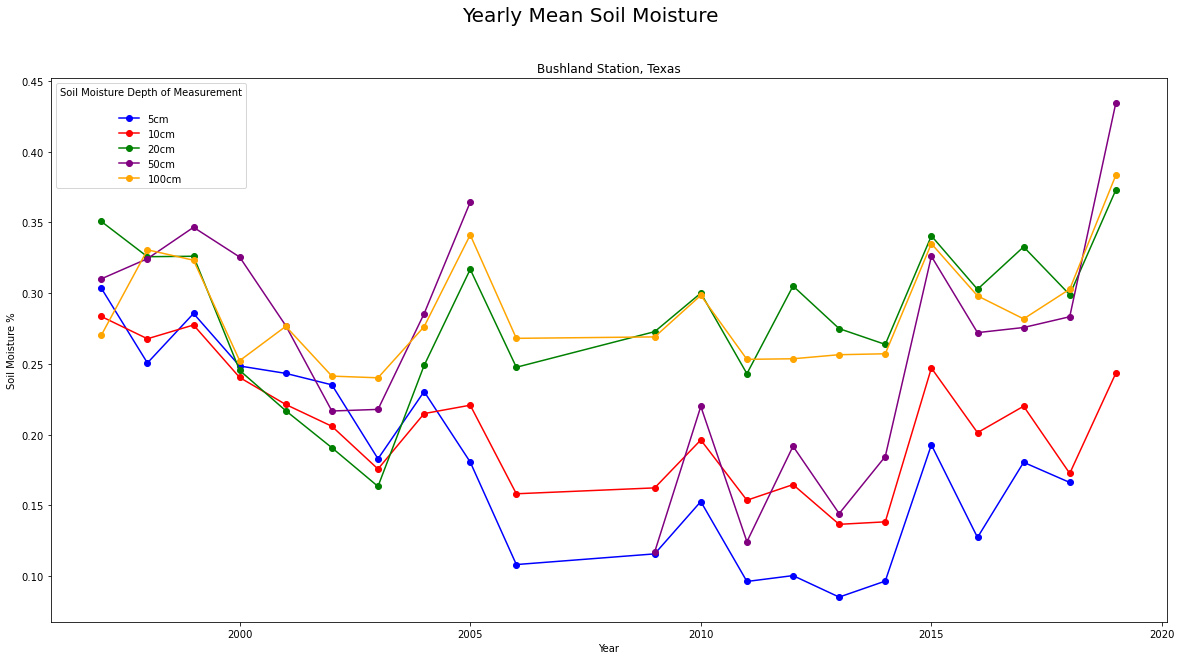

In [29]:
# Plot of yearly average soil moisture for a specified station across all years of data
customfunctions.plot_yearly_avg_sm(soil_moisture_dict["bushland"], "Bushland Station, Texas")

### Monthly plots

* The code cell below will generate a plot of monthly mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

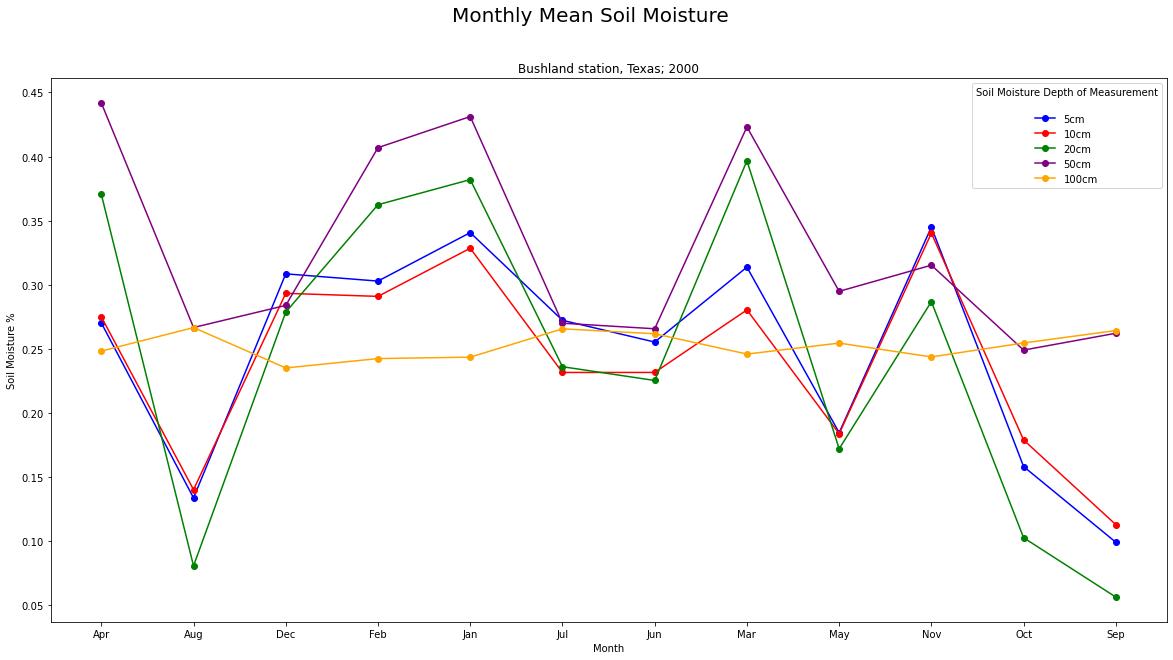

In [30]:
# Plot monthly average soil moisture for a specific station and year
customfunctions.plot_monthly_avg_sm(soil_moisture_dict["bushland"], 2000, "Bushland station, Texas; 2000")

### Daily plots

* The code cell below will generate a plot of daily mean soil moisture based on an input of the station name and the year specified.  This name must match the name given in the "Download and Import Data" section for the station.  AKA it must be the name of the station's key in the dictionary created to hold all of the station soil moisture dataframes.

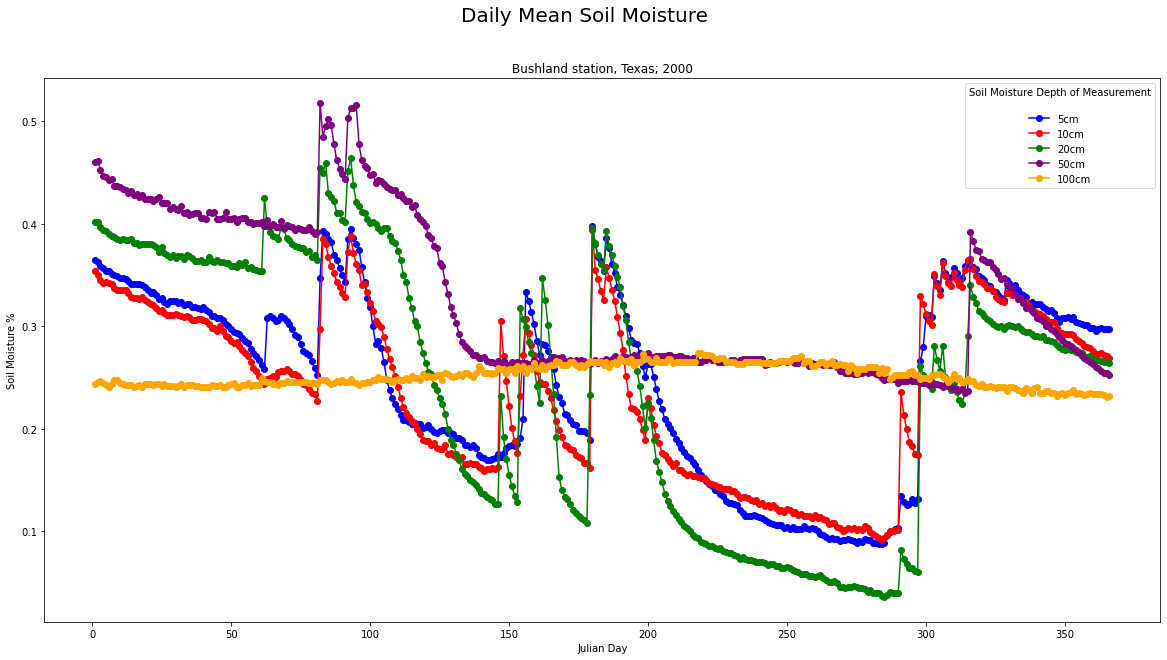

In [31]:
# Plot of daily mean soil moisture at a specified station for a specified year
customfunctions.plot_daily_avg_sm(soil_moisture_dict["bushland"], 2000, "Bushland station, Texas; 2000")